## Linear Dynamical System Example 

In this example we have a model of a fixed population of people who are interested in study a Coding Course

For Every Intake of the Coding course, 10% will start the course (90% wont!)

Of those studying 20% will complete the course, 7% will GIVE up (never to attempt it again!) , 8% will defer their studies, and 65% will remain studying 

This state transition diagram illustrates the model


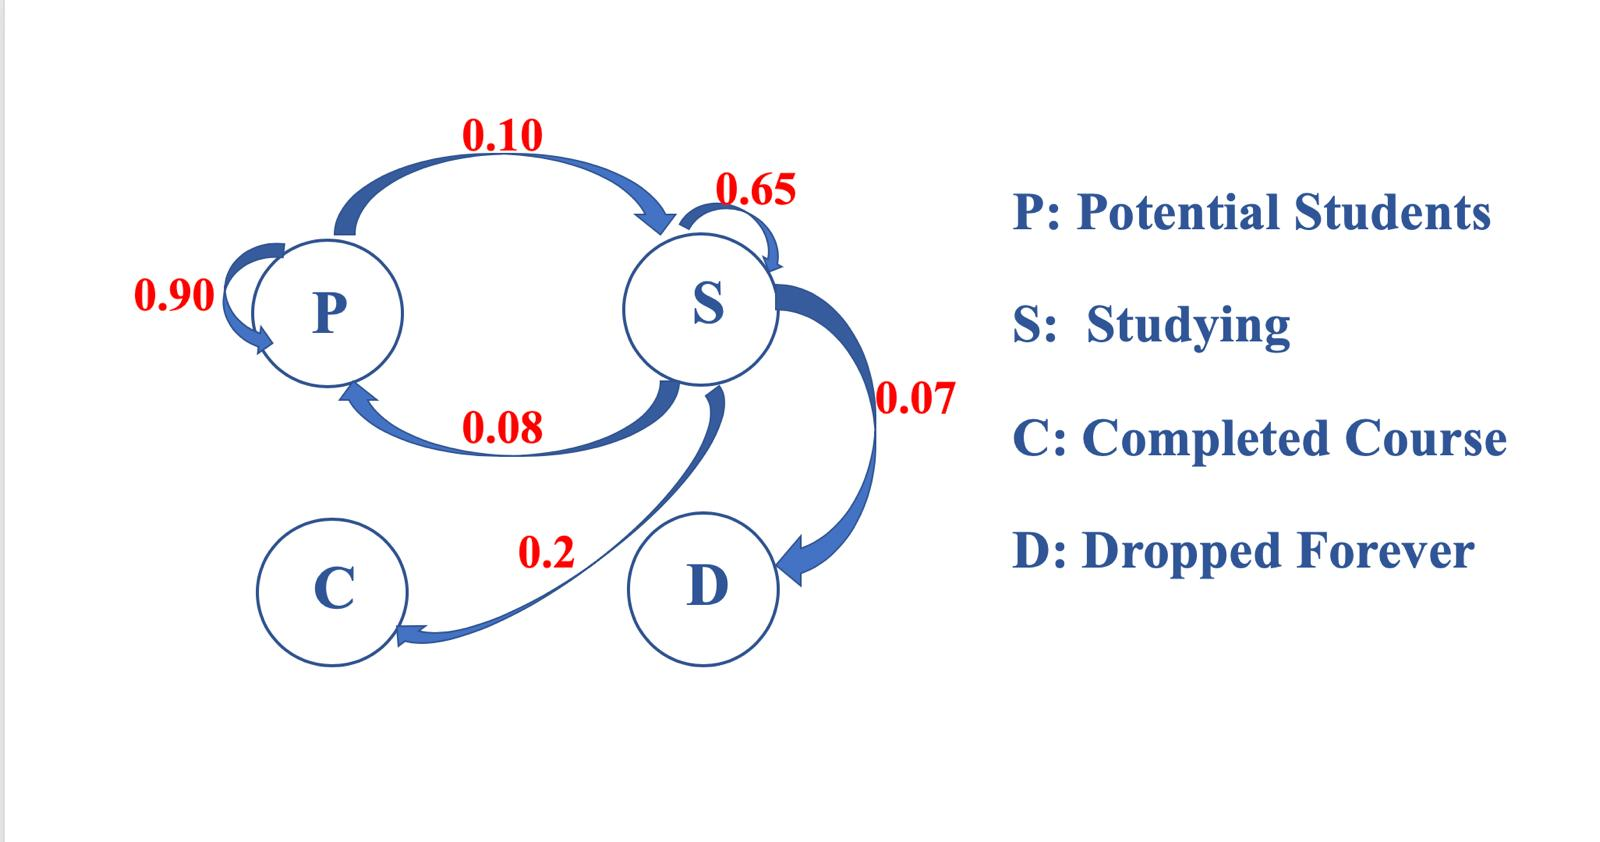

0.25925925925925924
0.7407407407407407


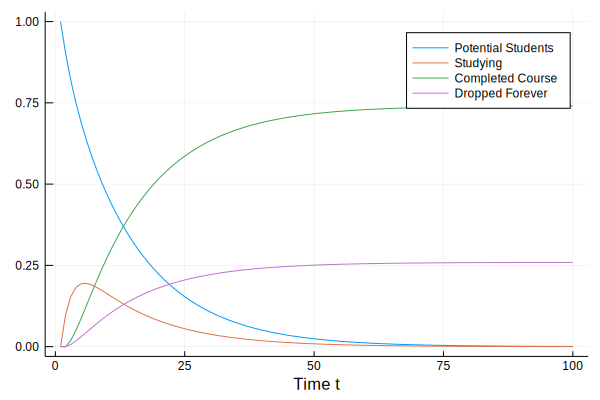

In [36]:
T = 100;
A = [ 0.9 0.08 0 0 ; 
      0.1 0.65 0 0 ;
      0   0.20 1 0 ; 
      0   0.07 0 1 ];
x_1 = [1,0,0,0];
state_traj = [x_1 zeros(4,T-1) ]; # State trajectory
for t=1:T-1 # Dynamics recursion
  state_traj[:,t+1] = A*state_traj[:,t];
end
println(7/(7+20)) #, remove this troy before submisison
println(20/(7+20))
using Plots
plot(1:T, state_traj', xlabel = "Time t",
label = ["Potential Students", "Studying", "Completed Course ", "Dropped Forever"])


## Q-Learning Example

We are now going to demonstrate Q-Learning using a  model from the same environment.

Imagine the government wants to encourage people to study by offering scholarships ...
Lets start by representing represent people's interest in this course by a Level, L  1- 10 , and assume that in any period this is equaly likely to increase(50%)  or decrease. Our model then says  that offering the scholarships causes the interest in the course to increase 75% of the time, but there is a varying cost 0-2.0 , associated with providing the scholarships.  

The aim is to use Q learning to determine the optimum choice of offering scholarships or not, dependent upon the cost of offering them and the current interest level L. 

The Q Learning algorithm uses the following formula to progressively estimate the "Quality" of a state and the action to take in that state


$$newQ_{S,A}=(1-\alpha)Q_{S,A}+\alpha(R_{S,A}, +\gamma max(Q'_{S',A'}))$$

Where $\alpha$ is the learning rate. $\alpha=0$: old knowledge is the only important, $\alpha=1$: new knowledge is the only important.

$\gamma$ is the discount factor. $\gamma=0$: short-term reward is only considered, $\gamma =1$: long-term reward is only considered.

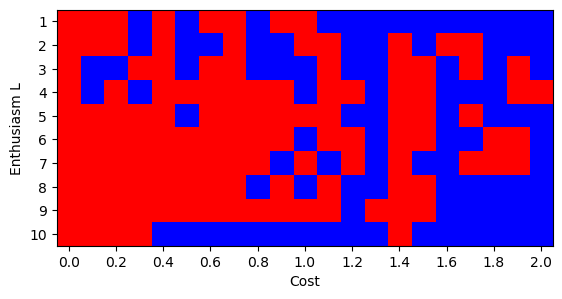

  0.694549 seconds (4.93 M allocations: 140.502 MiB, 7.52% gc time)


PyObject Text(24.000000000000007, 0.5, 'Enthusiasm L')

In [32]:
using LinearAlgebra, StatsBase, PyPlot, Random

L = 10
p0, p1 = 0.50, 0.75
beta = 0.75
pExplore(t) = t^-0.2
alpha(t) = t^-0.2
T = 10^6
Random.seed!(4)

function QlearnSim(Cost)
    P0 = diagm(1=>fill(p0,L-1)) + diagm(-1=>fill(1-p0,L-1))
    P0[1,1], P0[L,L] = 1 - p0, p0

    P1 = diagm(1=>fill(p1,L-1)) + diagm(-1=>fill(1-p1,L-1))
    P1[1,1], P1[L,L] = 1 - p1, p1

    R0 = collect(1:L)
    R1 = R0 .- Cost

    nextState(s,a) = a == 0 ? sample(1:L,weights(P0[s,:])) : sample(1:L,weights(P1[s,:]))

    Q = zeros(L,2)
    s = 1
    optimalAction(s) = Q[s,1] >= Q[s,2] ? 0 : 1
    for t in 1:T
        if rand() < pExplore(t)
            a = rand([0,1])
        else
            a = optimalAction(s)
        end
        sNew = nextState(s,a)
        r = a == 0 ? R0[sNew] : R1[sNew]
        Q[s,a+1]=(1-alpha(t))*Q[s,a+1]+alpha(t)*(r+beta*max(Q[sNew,1],Q[sNew,2]))
        s = sNew
    end
    [optimalAction(s) for s in 1:L]
end

T = 10^6
Random.seed!(4)

function  learn_and_graph() 
    CostGrid = 0.0:0.1:2.0
    policyMap = zeros(L,length(CostGrid))

    for (i,Cost) in enumerate(CostGrid)
        policyMap[:,i] = QlearnSim(Cost)
    end

    imshow(policyMap, cmap="bwr")
    xticks(0:2:20, 0:0.2:2); yticks(0:L-1, 1:L)
    xlabel("Cost"); ylabel("Enthusiasm L")
end

T = 10^4
Random.seed!(1)
@time learn_and_graph() 

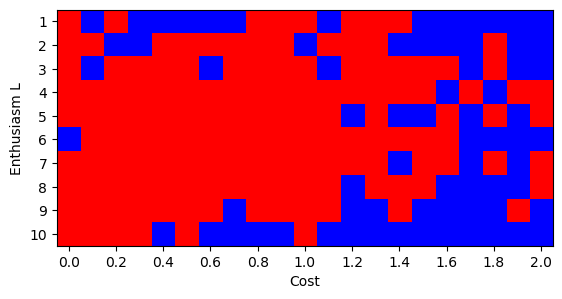

  3.887529 seconds (43.26 M allocations: 1.040 GiB, 7.12% gc time)


PyObject Text(24.000000000000007, 0.5, 'Enthusiasm L')

In [31]:
T = 10^5
Random.seed!(1)
@time learn_and_graph() 

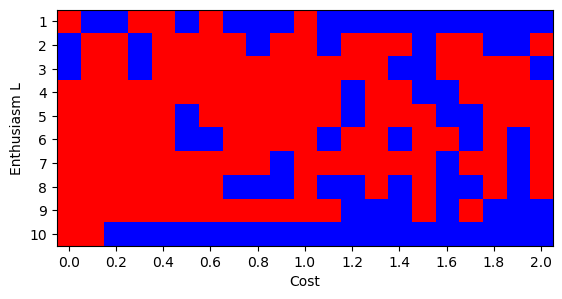

  3.186430 seconds (43.26 M allocations: 1.040 GiB, 6.87% gc time)


PyObject Text(24.000000000000007, 0.5, 'Enthusiasm L')

In [18]:
T = 10^5
Random.seed!(2)
@time learn_and_graph() 

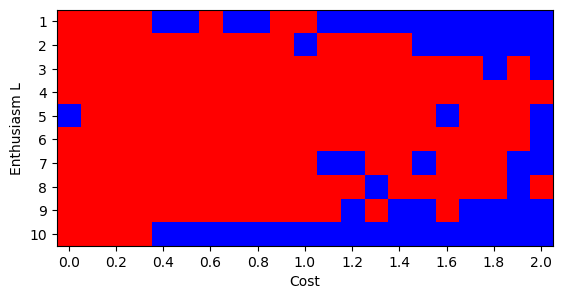

343.573013 seconds (4.32 G allocations: 102.642 GiB, 6.70% gc time)


PyObject Text(24.000000000000007, 0.5, 'Enthusiasm L')

In [20]:
T = 10^7
Random.seed!(1)
@time learn_and_graph() 